In [4]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [14]:
def black_scholes_call(S, K, T, r, sigma):
  """
  Pricing option call modèle BS

  Args:
    S: Prix actuel de l'actif sous-jacent.
    K: Prix d'exercice.
    T: Temps jusqu'à l'échéance (en années).
    r: Taux d'intérêt sans risque.
    sigma: Volatilité.

  Returns:
    Prix de l'option call.
  """
  d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
  d2 = d1 - sigma * np.sqrt(T)
  return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

def american_call_binomial(S, K, T, r, sigma, N):
  """
  Pricing option américaine modèle binomiale

  Args:
    S: Prix actuel de l'actif sous-jacent.
    K: Prix d'exercice.
    T: Temps jusqu'à l'échéance (en années).
    r: Taux d'intérêt sans risque.
    sigma: Volatilité.
    N: Nombre de pas de temps.

  Returns:
    Prix de l'option call.
  """
  dt = T / N
  u = np.exp(sigma * np.sqrt(dt))
  d = 1 / u
  p = (np.exp(r * dt) - d) / (u - d)
  # Matrice des prix de l'actif sous-jacent
  stock_prices = np.zeros((N + 1, N + 1))
  stock_prices[0, 0] = S
  for i in range(1, N + 1):
    for j in range(i + 1):
      stock_prices[i, j] = stock_prices[i - 1, j] * u
  # Matrice des prix des options
  option_prices = np.zeros((N + 1, N + 1))
  # Dernière ligne
  for j in range(N + 1):
    option_prices[N, j] = max(stock_prices[N, j] - K, 0)
  # Calcul du prix de l'option à chaque pas de temps
  for i in range(N - 1, -1, -1):
    for j in range(i + 1):
      option_prices[i, j] = np.exp(-r * dt) * (
          p * option_prices[i + 1, j + 1] + (1 - p) * option_prices[i + 1, j]
      )
      # Exercice prématuré possible
      option_prices[i, j] = max(option_prices[i, j], stock_prices[i, j] - K)
  return option_prices[0, 0]

# Paramètres à définir
S = 130  # Prix actuel de l'actif sous-jacent
K = 135  # Prix d'exercice
T = 0.4  # Temps jusqu'à l'échéance (en années)
r = 0.05  # Taux d'intérêt sans risque
sigma = 0.2  # Volatilité

# Prix de l'option européenne call
call_price_european = black_scholes_call(S, K, T, r, sigma)
print(f"Prix de l'option européenne call: {call_price_european:.2f}")

# Prix de l'option américaine call
N = 100  # Nombre de pas de temps
call_price_american = american_call_binomial(S, K, T, r, sigma, N)
print(f"Prix de l'option américaine call: {call_price_american:.2f}")

Prix de l'option européenne call: 5.52
Prix de l'option américaine call: 0.11


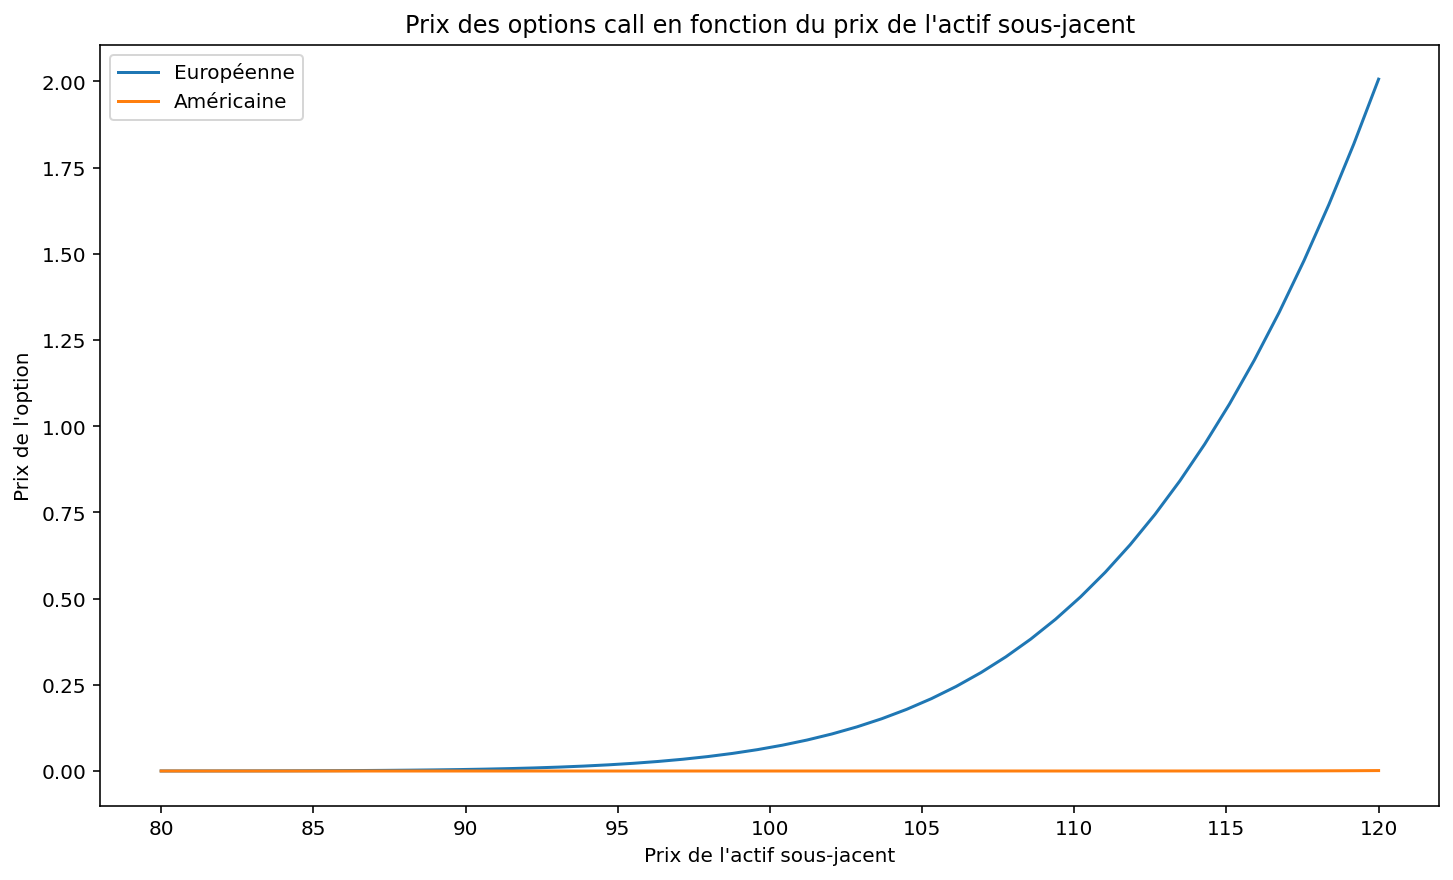

In [15]:
# Prix de l'actif sous-jacent
S_values = np.linspace(80, 120, 50)

# Prix des options européennes pour chaque prix de l'actif sous-jacent
call_prices_european = [black_scholes_call(S, K, T, r, sigma) for S in S_values]

# Prix des options américaines pour chaque prix de l'actif sous-jacent
call_prices_american = [american_call_binomial(S, K, T, r, sigma, N) for S in S_values]
plt.plot(S_values, call_prices_european, label="Européenne")
plt.plot(S_values, call_prices_american, label="Américaine")
plt.xlabel("Prix de l'actif sous-jacent")
plt.ylabel("Prix de l'option")
plt.title("Prix des options call en fonction du prix de l'actif sous-jacent")
plt.legend()
plt.show()